In [1]:
import os
dir_list = ["/shared/home/navermind/Training_data/label_body/Day33_201105_F/","/shared/home/navermind/Training_data/label_body/Day36_201108_F/"]

all_data = []
two_file = []
#os.remove("/Users/somang/Desktop/mymac/boostcamp/피트니스 자세 이미지/Training/.DS_Store/")
for dir in dir_list:
    json_list = os.listdir(dir)
    print(dir)
    for i in range(len(json_list)):
        if json_list[i]=='.DS_Store':
            continue
        json_list[i] = dir+json_list[i]
    two_file.append(json_list)

/shared/home/navermind/Training_data/label_body/Day33_201105_F/
/shared/home/navermind/Training_data/label_body/Day36_201108_F/


In [2]:
two_file

[['/shared/home/navermind/Training_data/label_body/Day33_201105_F/D33-7-598-3d.json',
  '/shared/home/navermind/Training_data/label_body/Day33_201105_F/D33-3-554-3d.json',
  '/shared/home/navermind/Training_data/label_body/Day33_201105_F/D33-5-515-3d.json',
  '/shared/home/navermind/Training_data/label_body/Day33_201105_F/D33-2-498-3d.json',
  '/shared/home/navermind/Training_data/label_body/Day33_201105_F/D33-3-557-3d.json',
  '/shared/home/navermind/Training_data/label_body/Day33_201105_F/D33-1-517.json',
  '/shared/home/navermind/Training_data/label_body/Day33_201105_F/D33-4-536.json',
  '/shared/home/navermind/Training_data/label_body/Day33_201105_F/D33-6-535-3d.json',
  '/shared/home/navermind/Training_data/label_body/Day33_201105_F/D33-5-506.json',
  '/shared/home/navermind/Training_data/label_body/Day33_201105_F/D33-4-537.json',
  '/shared/home/navermind/Training_data/label_body/Day33_201105_F/D33-2-554-3d.json',
  '/shared/home/navermind/Training_data/label_body/Day33_201105_F/

In [4]:
import json

for data in two_file:
    for file_dir in data:
        with open(file_dir, 'r', encoding="UTF-8") as f:
            json_data = json.load(f)
            break
        #print(json_data['frames'][0])
        #for i in range(len(json_data['frames'])):
        #    print(i)
        #    print(json_data['frames'][i])
        #    break
        #break

In [79]:
json_data['frames'][10]

{'view1': {'pts': {'Nose': {'x': 1245, 'y': 665},
   'Left Eye': {'x': 1245, 'y': 681},
   'Right Eye': {'x': 1262, 'y': 675},
   'Left Ear': {'x': 1214, 'y': 722},
   'Right Ear': {'x': 1264, 'y': 711},
   'Left Shoulder': {'x': 1125, 'y': 711},
   'Right Shoulder': {'x': 1198, 'y': 656},
   'Left Elbow': {'x': 1054, 'y': 510},
   'Right Elbow': {'x': 1091, 'y': 513},
   'Left Wrist': {'x': 1024, 'y': 528},
   'Right Wrist': {'x': 1041, 'y': 498},
   'Left Hip': {'x': 1012, 'y': 638},
   'Right Hip': {'x': 985, 'y': 645},
   'Left Knee': {'x': 1048, 'y': 520},
   'Right Knee': {'x': 1054, 'y': 385},
   'Left Ankle': {'x': 1045, 'y': 498},
   'Right Ankle': {'x': 1071, 'y': 490},
   'Neck': {'x': 1193, 'y': 702},
   'Left Palm': {'x': 1020, 'y': 510},
   'Right Palm': {'x': 1028, 'y': 501},
   'Back': {'x': 1117, 'y': 676},
   'Waist': {'x': 1005, 'y': 610},
   'Left Foot': {'x': 1022, 'y': 516},
   'Right Foot': {'x': 1047, 'y': 501}},
  'active': 'Yes',
  'img_key': 'Day36_201108_F/6

[[ 941   36 1030  213]
 [1016  208 1120  417]
 [ 345  144  539  532]
 [ 855   30 1073  466]]


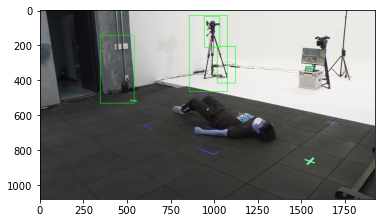

In [6]:
import numpy as np
import cv2

# initialize the HOG descriptor/person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

def detect_person(view,i):
    
    dir = json_data['frames'][i][view]['img_key']
    
    if dir.startswith('Day36'):
        root = '/shared/home/navermind/Training_data/image_body_10/'
    elif dir.startswith('Day33'):
        root = '/shared/home/navermind/Training_data/image_body_8/'
    else: print("none")
    frame = cv2.imread(root+dir)
    # using a greyscale picture, also for faster detection
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

    # detect people in the image
    # returns the bounding boxes for the detected objects
    boxes, weights = hog.detectMultiScale(frame, winStride=(8,8) )

    boxes = np.array([[x, y, x + w, y + h] for (x, y, w, h) in boxes])

    for (xA, yA, xB, yB) in boxes:
        # display the detected boxes in the colour picture
        cv2.rectangle(frame, (xA, yA), (xB, yB),
                          (0, 255, 0), 2)
    print(boxes)
    from matplotlib import pyplot as plt
    plt.imshow(frame)
flag = False
for data in two_file:
    for file_dir in data:
        with open(file_dir, 'r', encoding="UTF-8") as f:
            json_data = json.load(f)
        for i in range(len(json_data['frames'])):
            if 'view1' in json_data['frames'][i].keys():
                detect_person('view1',i)
                flag=True
                break
            if 'view2' in json_data['frames'][i].keys():
                detect_person('view2',i)
                flag=True
                break
            if 'view3' in json_data['frames'][i].keys():
                detect_person('view3',i)
                flag=True
                break
            if 'view4' in json_data['frames'][i].keys():
                detect_person('view4',i)
                flag=True
                break
            if 'view5' in json_data['frames'][i].keys():
                detect_person('view5',i)
                flag=True
                break
            if flag==True:
                break
        if flag==True:
            break
    if flag==True:
        break


In [81]:
json_data['frames']

[{'pts': {'Nose': {'x': -30.12946128845215,
    'y': 145.04527282714844,
    'z': -21.844974517822266},
   'Left Eye': {'x': -30.39531707763672,
    'y': 148.73435974121094,
    'z': -17.949813842773438},
   'Right Eye': {'x': -30.64422607421875,
    'y': 147.9042205810547,
    'z': -21.071374893188477},
   'Left Ear': {'x': -24.242769241333008,
    'y': 152.81307983398438,
    'z': -10.304534912109375},
   'Right Ear': {'x': -21.04005241394043,
    'y': 153.4340362548828,
    'z': -19.069852828979492},
   'Left Shoulder': {'x': -9.453084945678711,
    'y': 145.86529541015625,
    'z': -3.99780535697937},
   'Right Shoulder': {'x': -9.266251564025879,
    'y': 145.20712280273438,
    'z': -38.62350082397461},
   'Left Elbow': {'x': -10.025672912597656,
    'y': 119.68807220458984,
    'z': -15.137965202331543},
   'Right Elbow': {'x': -14.257087707519531,
    'y': 117.64949035644531,
    'z': -49.760276794433594},
   'Left Wrist': {'x': -6.464390754699707,
    'y': 102.33403015136719,
